# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

## CODE-1

<font color='red'> Reading the csv file </font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
#path = '/content/drive/MyDrive/AAIC/Assignments/15.Recommendation Systems and Truncated SVD SGD algorithm to predict ratings/practice/ratings_train.csv'
path = '/content/drive/MyDrive/AAIC/Assignments/15.Recommendation Systems and Truncated SVD SGD algorithm to predict ratings/practice/ratings_train_.csv'
data=pd.read_csv(path)
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [3]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [4]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [5]:
cols = (sorted(data['item_id'].unique()))
rows = (sorted(data['user_id'].unique()))

In [6]:
adj_mat = np.zeros(shape=(rows[-1]+1,cols[-1]+1))
for i in tqdm(rows):
  df = data[data['user_id']==i]
  df = df.drop('user_id',axis=1)
  for ind,val in enumerate(df.values):
    adj_mat[i,val[0]] = val[1]


In [7]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix(adj_mat.astype('float'))

<font color='cyan'>Grader function - 1</font>

In [8]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [9]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [10]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


<font color='red'>Compute mean of ratings</font>

In [11]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    
    return np.mean(ratings)

In [12]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [13]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [14]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    return list(np.zeros(shape=(dim)))

In [15]:
#dim= # give the number of dimensions for b_i (Here b_i corresponds to users)
dim = adjacency_matrix.shape[0]
b_i=initialize(dim)

In [16]:
#dim= # give the number of dimensions for c_j (Here c_j corresponds to movies)
dim = adjacency_matrix.shape[1]
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [17]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [18]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    reg = 2*alpha*(b_i[user_id])
    los = 2*(rating-mu-b_i[user_id]-c_j[item_id]-(np.dot(U[user_id],V.T[item_id])))
    res = reg-los
    return res


<font color='cyan'>Grader function -4 </font>

In [19]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [20]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    reg = 2*alpha*(c_j[item_id])
    los = 2*(rating-mu-b_i[user_id]-c_j[item_id]-(np.dot(U[user_id],V.T[item_id])))
    res = reg-los
    return res

<font color='cyan'>Grader function - 5 </font>

In [21]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,r)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [22]:
from sklearn.metrics import mean_squared_error
#learning_rate = [10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2)]
learning_rate = 10**(-3)
alpha = 0.01
d = dict()
for epoch in tqdm(range(1,21)):
  y_pred = list()
  for i in range(data.shape[0]):
    user_id = data['user_id'].iloc[i] 
    item_id = data['item_id'].iloc[i] 
    rating  = data['rating'].iloc[i] 
    b_i[user_id] = b_i[user_id] - ((learning_rate)*(derivative_db(user_id,item_id,rating,U,VT,mu,alpha)))
    c_j[item_id] = c_j[item_id] - ((learning_rate)*(derivative_dc(user_id,item_id,rating,U,VT,mu, alpha)))
    y_pred.append(mu + b_i[user_id] + c_j[item_id] + ((np.dot(U[user_id],VT.T[item_id]))))
  rmse = mean_squared_error(data['rating'].values,y_pred)
  d[epoch] = rmse

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

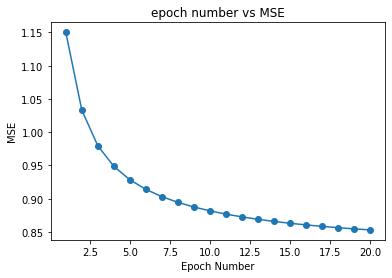

In [23]:
import matplotlib.pyplot as plt
plt.plot(list(d.keys()),list(d.values()),'-o')
plt.xlabel('Epoch Number')
plt.ylabel('MSE')
plt.title('epoch number vs MSE')
plt.show()

<font color='red'> Task 2</font>

In [80]:
path = '/content/drive/MyDrive/AAIC/Assignments/15.Recommendation Systems and Truncated SVD SGD algorithm to predict ratings/practice/user_info.csv.txt'
data = pd.read_csv(path)

In [81]:
data.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [82]:
data = data.drop('user_id',axis = 1)

In [83]:
data.head()

,age,is_male,orig_user_id
0,24,1,1
1,53,0,2
2,23,1,3
3,24,1,4
4,33,0,5


In [84]:
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
U = pd.DataFrame(U)
U['age'] = data['age']
U['is_male'] = data['is_male']


In [85]:
U['is_male'].value_counts()

1    670
0    273
Name: is_male, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
y = U['is_male']
U = U.drop('is_male',axis=1)
U.head()

,0,1,2,3,4,age
0,0.066226,0.007889,-0.012530,-0.086148,0.024857,24
1,0.013644,-0.048895,0.056553,0.015829,-0.012001,53
2,0.005438,-0.025128,0.020029,0.032808,0.035067,23
3,0.005704,-0.018211,0.010899,0.021852,0.013918,24
4,0.034122,0.009005,-0.044054,-0.016014,0.004374,33


In [87]:
X_res, y_res = sm.fit_resample(U, y)

In [88]:
from collections import Counter
Counter(y_res)

Counter({0: 670, 1: 670})

In [89]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix


In [90]:
def fun(normalize,model,x,y):
  if normalize:
    std_data = pd.DataFrame(StandardScaler().fit_transform(x))
    print('DATA IS NORMALIZED')
  else:
    std_data = x
    print('DATA IS NOT NORMALIZED')
  model.fit(std_data,y)
  pred = model.predict(std_data)
  print('\nf1_score',f1_score(y,pred))
  cm = plot_confusion_matrix(model,std_data,y,)
  plt.title('Confusion_Matrix')
  return

#TRYING DIFFERENT BINARY-CLASSIFICATION MODELS

## LOGISTIC-REGRESSION

DATA IS NORMALIZED

f1_score 0.6275331935709294


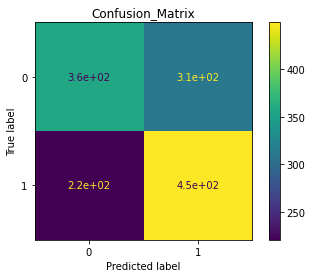

In [92]:
logistic_regrsn = SGDClassifier(loss='log')
fun(normalize=True,model=logistic_regrsn,x=X_res,y=y_res)

DATA IS NOT NORMALIZED

f1_score 0.0


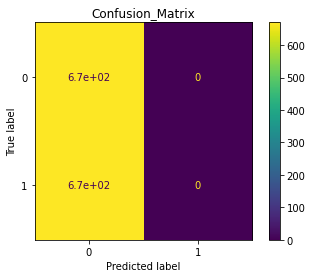

In [99]:
fun(normalize=False,model=logistic_regrsn,x=X_res,y=y_res)

## KNN

DATA IS NORMALIZED

f1_score 0.7410071942446043


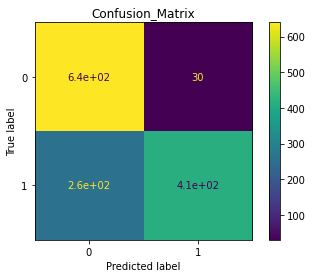

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
neigh = KNeighborsClassifier(n_neighbors=4)
fun(normalize=True,model=neigh,x=X_res,y=y_res)

DATA IS NOT NORMALIZED

f1_score 0.7312217194570136


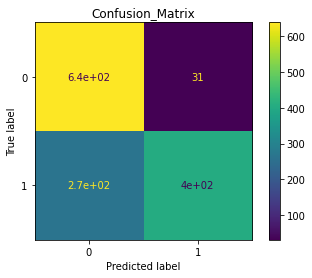

In [116]:
fun(normalize=False,model=neigh,x=X_res,y=y_res)

## DecisionTreeClassifier

DATA IS NORMALIZED

f1_score 1.0


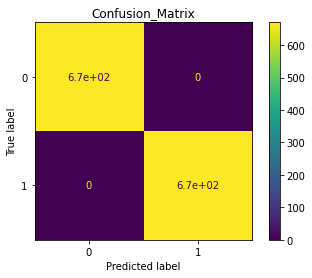

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DT_clf = DecisionTreeClassifier(random_state=0)
fun(normalize=True,model=DT_clf,x=X_res,y=y_res)

DATA IS NOT NORMALIZED

f1_score 1.0


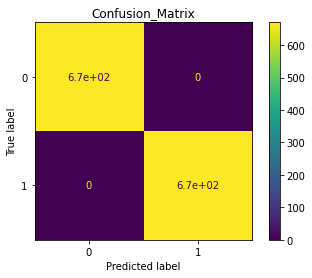

In [118]:
fun(normalize=False,model=DT_clf,x=X_res,y=y_res)

## SVC

DATA IS NORMALIZED

f1_score 0.723673792557403


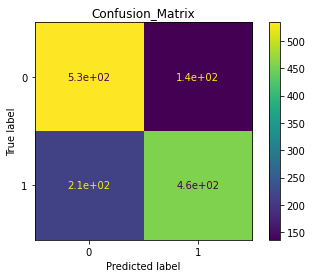

In [119]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
fun(normalize=True,model=svc,x=X_res,y=y_res)

DATA IS NOT NORMALIZED

f1_score 0.6114068441064638


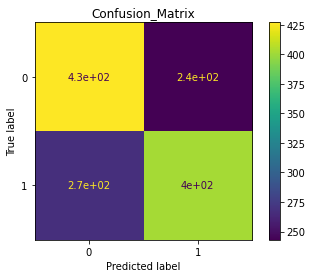

In [120]:
fun(normalize=False,model=svc,x=X_res,y=y_res)

## GNB

DATA IS NORMALIZED

f1_score 0.5431425976385105


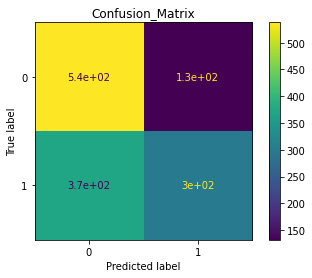

In [122]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
fun(normalize=True,model=gnb,x=X_res,y=y_res)

DATA IS NOT NORMALIZED

f1_score 0.5431425976385105


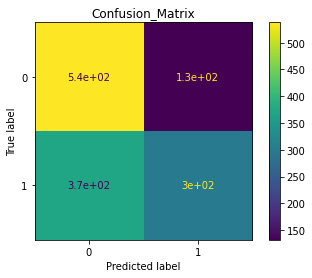

In [123]:
fun(normalize=False,model=gnb,x=X_res,y=y_res)